In [119]:
# ---------------------------------------------
# UNDP People's Climate Vote 2024 - Age Gap Analysis
# Person 1: Data Acquisition & Preprocessing
# ---------------------------------------------

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# 2️⃣ Load dataset
# Replace 'pcv2024.csv' with path to downloaded CSV from https://peoplesclimate.vote/data-center
df = pd.read_excel("/content/Peoples_Climate_Vote_Database_2024.xlsx")

In [105]:
df['Country'] = df['Country'].replace({
    'United States of America (the)': 'USA',
    'United Kingdom of Great Britain and Northern Ireland (the)': 'UK',
    'Democratic Republic of the Congo': 'DRC',
    'Iran (Islamic Republic of)': 'Iran',
    'Niger (the)': 'Niger',
    'Philippines (the)': 'Philippines',
    'Tanzania (the United Republic of)': 'Tanzania',
    'Russian Federation (the)': 'Russia',
    'Republic of Korea (the)': 'South Korea'
})


In [106]:
# Quick look at dataset
print(df.shape)
print(df.columns)

(45784, 17)
Index(['Column1', 'ID', 'CID', 'QID', 'RID', 'EID', 'AID', 'Country',
       'Question Text', 'Question Text (Short)', 'Response', 'Education',
       'Age', 'Weighted Mean', 'Cat ID', 'Category', 'Question Context'],
      dtype='object')


In [107]:
# 3️⃣ Filter to the question of interest
question_text = "How quickly should your country replace coal, oil, and gas with renewable energy, such as power from the wind or sun?"
df_question = df[df['Question Text'] == question_text]
df_question = df_question[['Country', 'Age', 'Question Text', 'Response', 'Weighted Mean']]
df_question = df_question[~df_question['Age'].isin(['All Ages'])]
df_question = df_question[df_question['Response'] == "Very quickly"]
df_question['Weighted Mean'] = df_question['Weighted Mean'].replace('NA', np.nan)
df_question = df_question.dropna(subset=['Weighted Mean'])
df_question.shape

(147, 5)

In [108]:
# 5️⃣ Handle Age Groups: map to Young/Old
age_map = {
    'Under 18': 'Young',
    '18 to 35': 'Young',
    '36 to 59': 'Old',
    '60 plus': 'Old',
    'All Ages': 'All Ages'  # keep aggregate row
}
df_question['Age Group'] = df_question['Age'].map(age_map)
print("Unique Age Groups after mapping:", df_question['Age Group'].unique())



Unique Age Groups after mapping: ['Young' 'Old']


In [109]:
# 8️⃣ Create clean dataset
# Keep only relevant columns
df_clean = df_question[['Country', 'Age Group', 'Weighted Mean']].copy()
df_clean.rename(columns={'Weighted Mean': '% Urgent'}, inplace=True)

In [110]:
# 9️⃣ Age Gap Calculation
# Separate Young and Old groups
df_age = df_clean[df_clean['Age Group'].isin(['Young', 'Old'])]

# Pivot table to get % Urgent for Young and Old
pivot = df_age.pivot_table(
    index='Country',
    columns='Age Group',
    values='% Urgent',
    aggfunc=np.mean  # mean across education levels
).reset_index()

# Calculate Age Gap
pivot['Age Gap'] = pivot['Young'] - pivot['Old']
pivot['Absolute Gap'] = pivot['Age Gap'].abs()

# Sort countries by magnitude of absolute age gap
age_gap_master = pivot.sort_values('Absolute Gap', ascending=False)


/tmp/ipython-input-582444863.py:6: FutureWarning: The provided callable <function mean at 0x7c3387cf4220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = df_age.pivot_table(


In [111]:
from os import truncate
# 10️⃣ Save outputs
df_clean.to_csv("PCV2024_VeryQuickly_CleanDataset.csv", index=False)
age_gap_master.to_csv("PCV2024_AgeGap_MasterTable.csv", index=False)

# ✅ Print first few rows for verification
print(age_gap_master.head())


Age Group      Country   Old  Young  Age Gap  Absolute Gap
62                 USA  23.5   38.0     14.5          14.5
61                  UK  32.0   43.0     11.0          11.0
52               Samoa  51.0   41.0    -10.0          10.0
0          Afghanistan  31.0   39.0      8.0           8.0
23               Ghana  61.0   54.0     -7.0           7.0


In [112]:
age_gap_master

Age Group,Country,Old,Young,Age Gap,Absolute Gap
62,USA,23.5,38.0,14.5,14.5
61,UK,32.0,43.0,11.0,11.0
52,Samoa,51.0,41.0,-10.0,10.0
0,Afghanistan,31.0,39.0,8.0,8.0
23,Ghana,61.0,54.0,-7.0,7.0
...,...,...,...,...,...
3,Australia,41.5,42.0,0.5,0.5
29,Indonesia,19.0,19.0,0.0,0.0
18,El Salvador,20.0,20.0,0.0,0.0
32,Italy,46.0,NaN,NaN,NaN


In [113]:
# Extras...
# Group countries by region (Europe, Asia, Africa, Americas, Oceania)
# -------------------------
# Add region mapping manually
# -------------------------

region_map = {
    # Africa
    'South Africa': 'Africa', 'Ghana': 'Africa', 'Nigeria': 'Africa', 'Kenya': 'Africa',
    'Ethiopia': 'Africa', 'Tanzania': 'Africa', 'Uganda': 'Africa',
    'Zimbabwe': 'Africa', 'Sudan': 'Africa', 'Morocco': 'Africa', 'Algeria': 'Africa',
    'Egypt': 'Africa', 'Madagascar': 'Africa', 'Mozambique': 'Africa', 'Benin': 'Africa',
    'Burkina Faso': 'Africa', "Côte d'Ivoire": 'Africa', 'Niger': 'Africa',
    'DRC': 'Africa',

    # Asia & Pacific
    'India': 'Asia-Pacific', 'Bangladesh': 'Asia-Pacific', 'China': 'Asia-Pacific',
    'Indonesia': 'Asia-Pacific', 'Japan': 'Asia-Pacific', 'South Korea': 'Asia-Pacific',
    'Cambodia': 'Asia-Pacific', 'Nepal': 'Asia-Pacific', 'Myanmar': 'Asia-Pacific',
    'Bhutan': 'Asia-Pacific', 'Lao PDR': 'Asia-Pacific', 'Pakistan': 'Asia-Pacific',
    'Philippines': 'Asia-Pacific', 'Sri Lanka': 'Asia-Pacific', 'Australia': 'Asia-Pacific',
    'Papua New Guinea': 'Asia-Pacific', 'Fiji': 'Asia-Pacific', 'Solomon Islands': 'Asia-Pacific',
    'Vanuatu': 'Asia-Pacific', 'Samoa': 'Asia-Pacific', 'Comoros': 'Asia-Pacific',
    'Kyrgyzstan': 'Asia-Pacific',

    # Europe
    'UK': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Spain': 'Europe', 'Italy': 'Europe',
    'Romania': 'Europe', 'Greece': 'Europe', 'Czechia': 'Europe', 'Russia': 'Europe',

    # Americas
    'USA': 'Americas', 'Canada': 'Americas',
    'Mexico': 'Americas', 'Brazil': 'Americas', 'Argentina': 'Americas',
    'Colombia': 'Americas', 'Peru': 'Americas', 'Ecuador': 'Americas',
    'Dominican Republic': 'Americas', 'Paraguay': 'Americas',
    'Guatemala': 'Americas', 'Honduras': 'Americas', 'Nicaragua': 'Americas',
    'Haiti': 'Americas', 'El Salvador': 'Americas', 'Barbados': 'Americas',

    # Middle East & North Africa
    'Saudi Arabia': 'MENA', 'Iran': 'MENA', 'Iraq': 'MENA',
    'Jordan': 'MENA', 'Tunisia': 'MENA', 'Morocco': 'MENA', 'Sudan': 'MENA',
    'Afghanistan': 'MENA', 'Egypt': 'MENA',

    # fallback
    'Global': 'Global'
}

age_gap_master['Region'] = age_gap_master['Country'].map(region_map)


In [114]:
# ------------------------------------------------------------
# 5. Descriptive Statistics
# ------------------------------------------------------------
stats = age_gap_master['Absolute Gap'].describe(percentiles=[0.25, 0.5, 0.75]).to_frame().T
stats['range'] = stats['max'] - stats['min']
stats['std'] = age_gap_master['Age Gap'].std()
print("\n=== Descriptive Statistics for Age Gap ===")
print(stats.T)


=== Descriptive Statistics for Age Gap ===
       Absolute Gap
count     63.000000
mean       3.984127
std        4.875761
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       14.500000
range     14.500000


In [115]:
#------------------------------------------------------------
# 6. Identify Countries with Largest and Smallest Gaps
# ------------------------------------------------------------
ranked = age_gap_master

top5_largest_gaps = age_gap_master.sort_values('Absolute Gap', ascending=False).head(5)
top5_smallest_gaps = age_gap_master.sort_values('Absolute Gap', ascending=True).head(5)
#reversals = age_gap_master[age_gap_master['Age Gap'] < 0].sort_values('Age Gap')

print("\n Top 5 largest gaps")
print(top5_largest_gaps)

print("\n Top 5 smallest gaps:")
print(top5_smallest_gaps)


 Top 5 largest gaps
Age Group      Country   Old  Young  Age Gap  Absolute Gap        Region
62                 USA  23.5   38.0     14.5          14.5      Americas
61                  UK  32.0   43.0     11.0          11.0        Europe
52               Samoa  51.0   41.0    -10.0          10.0  Asia-Pacific
0          Afghanistan  31.0   39.0      8.0           8.0          MENA
23               Ghana  61.0   54.0     -7.0           7.0        Africa

 Top 5 smallest gaps:
Age Group      Country   Old  Young  Age Gap  Absolute Gap        Region
29           Indonesia  19.0   19.0      0.0           0.0  Asia-Pacific
18         El Salvador  20.0   20.0      0.0           0.0      Americas
3            Australia  41.5   42.0      0.5           0.5  Asia-Pacific
47            Paraguay  30.0   29.0     -1.0           1.0      Americas
25           Guatemala  21.0   22.0      1.0           1.0      Americas


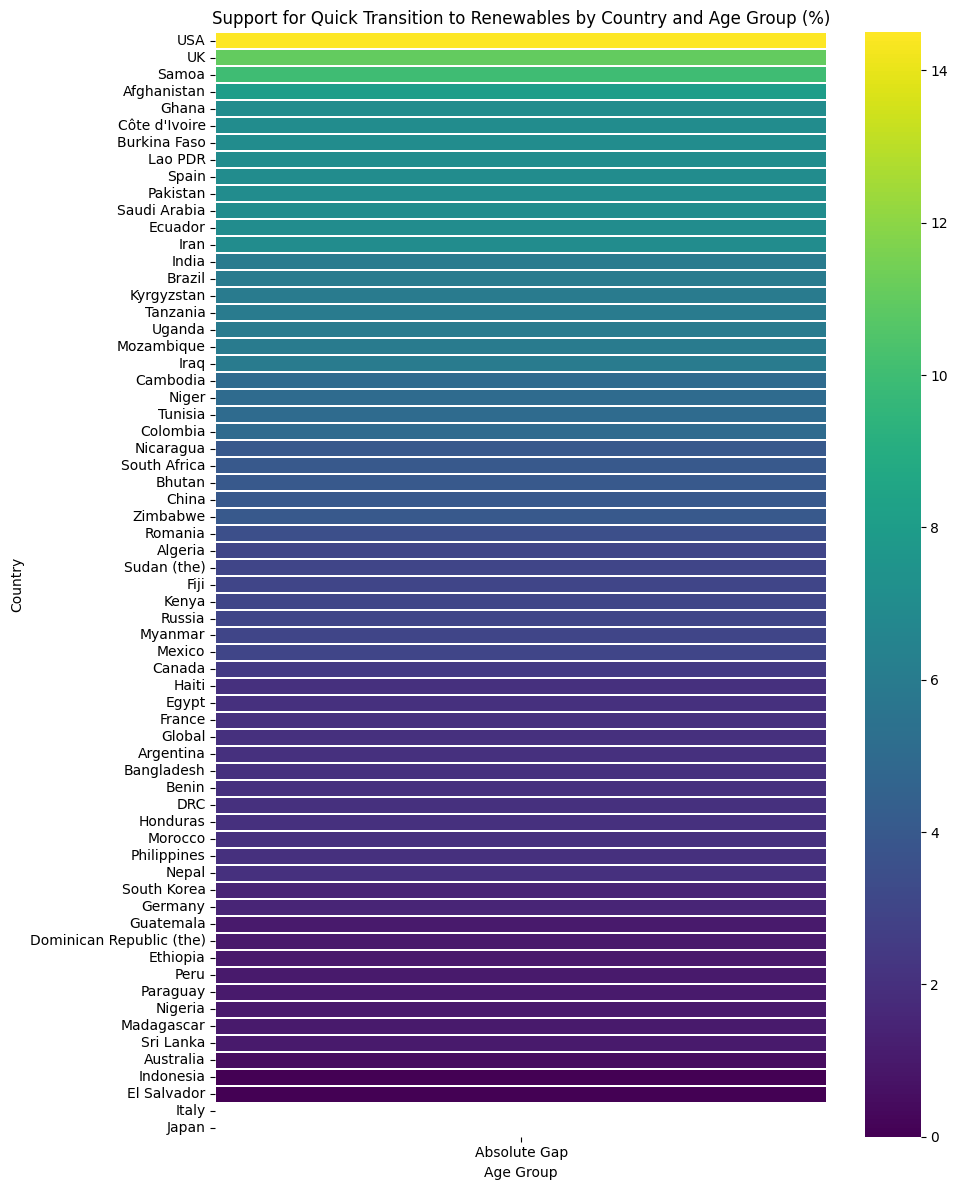

In [116]:
plt.figure(figsize=(10, 12))
heat_data = age_gap_master.set_index('Country')[['Absolute Gap']]
sns.heatmap(heat_data, cmap='viridis', linewidths=0.2)
plt.title('Support for Quick Transition to Renewables by Country and Age Group (%)')
plt.xlabel('Age Group')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('heatmap_quick_by_age_country.png', dpi=150)
plt.show()

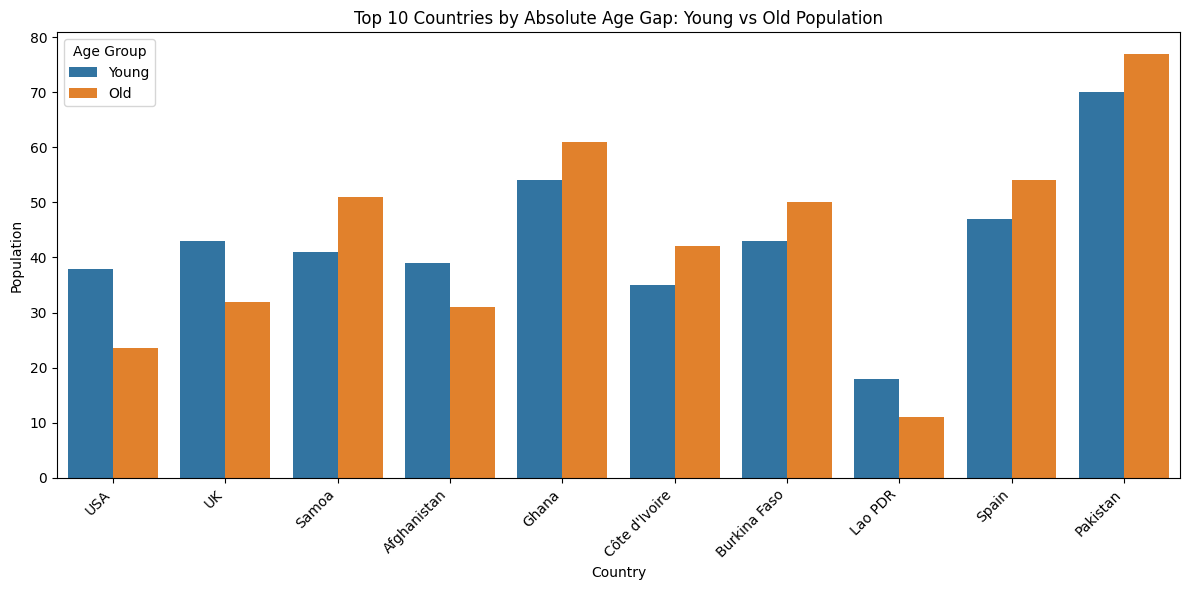

In [117]:
# Select top 10 countries by Absolute Gap
top10 = age_gap_master.sort_values('Absolute Gap', ascending=False).head(10)

# Melt the dataframe to long format
top10_melted = top10.melt(
    id_vars='Country',                  # columns to keep as identifiers
    value_vars=['Young', 'Old'],        # columns to melt
    var_name='Age Group',               # new column for melted column names
    value_name='Population'             # new column for values
)

# Create grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_melted, x='Country', y='Population', hue='Age Group')
plt.title('Top 10 Countries by Absolute Age Gap: Young vs Old Population')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()

         Region  Absolute Gap
5          MENA      5.285714
3        Europe      4.666667
0        Africa      4.062500
2  Asia-Pacific      3.764706
1      Americas      3.642857
4        Global      2.000000
6           NaN      2.000000


/tmp/ipython-input-2073988748.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


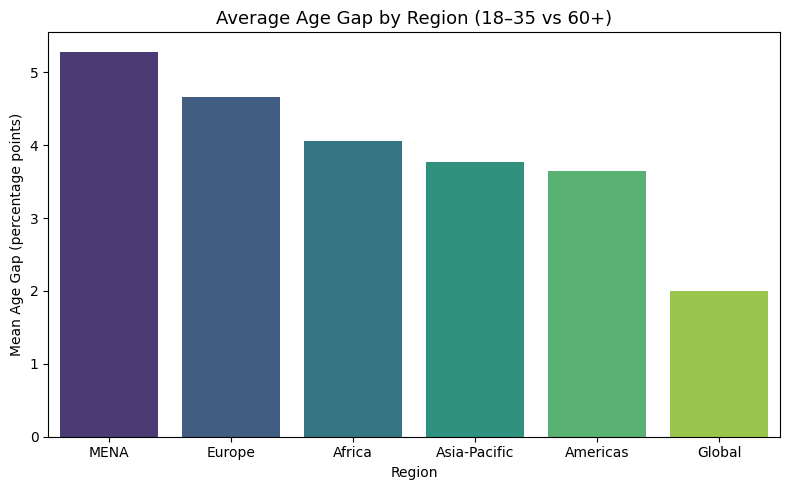

In [118]:
region_avg = (
    age_gap_master.groupby('Region', dropna=False)['Absolute Gap']
    .mean()
    .reset_index()
    .sort_values('Absolute Gap', ascending=False)
)

print(region_avg)

#Bar Chart (Mean Age Gap by Region)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=region_avg.sort_values('Absolute Gap', ascending=False),
    x='Region', y='Absolute Gap', palette='viridis'
)
plt.title('Average Age Gap by Region (18–35 vs 60+)', fontsize=13)
plt.xlabel('Region')
plt.ylabel('Mean Age Gap (percentage points)')
plt.tight_layout()
plt.show()

1. The largest positive gaps are mostly in developed or industrialized countries (USA, UK).

2. The largest negative gaps appear in some African countries and small island states (Samoa), suggesting older populations sometimes express higher urgency, possibly due to climate vulnerability.

3. Developing countries and LDCs (like Bangladesh, Benin, Democratic Republic of Congo, Ethiopia, Nepal, Madagascar) show smaller gaps (1-2), indicating more consensus across age groups.

4. Overall trend: Youth generally push for more urgent renewable transition, strongest in industrialized regions.


